# Author: ddukic

In [3]:
import wandb
import pandas as pd
import sys
import json
from statistics import mean, stdev
sys.path.append("../")
from result_utils import * 
%matplotlib inline

api = wandb.Api()

def fetch_run_summary(run_url):
    run_key = run_url.split("/")[-1]
    return api.run("ddukic/oee-paper/" + run_key).summary

In [4]:
results_seed_42 = json.load(open("seed_42.json", "r"))
results_seed_43 = json.load(open("seed_43.json", "r"))
results_seed_44 = json.load(open("seed_44.json", "r"))

In [8]:
temp = [[id for _, id in v.items()] for _, v in results_seed_42.items()]
wandb_keys = []

for x in temp:
    for k in x:
        wandb_keys.append(k)

print("all unique:", len(wandb_keys) == len(set(wandb_keys)))

all unique: True


In [9]:
results_check_all_equal = {
    k: {
        setting: extract_name(run_42).replace("SEED=42", "")
        == extract_name(run_43).replace("SEED=43", "")
        == extract_name(run_44).replace("SEED=44", "")
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

In [5]:
# for some reason, the averaged case doesn't exist in one entry
def get_f1(data_seed, k):
    f1 = extract_target_performance(fetch_run_summary(data_seed), k, "f1")
    return 0.0 if f1 is None else f1


results_target_f1_table_data_mean = {
    k: {
        setting: format(
            round(
                mean([get_f1(run_42, k), get_f1(run_43, k), get_f1(run_44, k)]),
                3,
            ),
            ".3f",
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

results_target_f1_table_data_std = {
    k: {
        setting: format(
            round(
                stdev([get_f1(run_42, k), get_f1(run_43, k), get_f1(run_44, k)]),
                3,
            ),
            ".3f",
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

results_target_f1_plot_data = {
    k: {
        setting: mean([get_f1(run_42, k), get_f1(run_43, k), get_f1(run_44, k)])
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

# results_seed_42_target_precision = {
#     k: {setting: extract_target_performance(fetch_run_summary(run), k, "precision") for setting, run in v.items()}
#     for k, v in results_seed_42.items()
# }

# results_seed_42_target_recall = {
#     k: {setting: extract_target_performance(fetch_run_summary(run), k, "recall") for setting, run in v.items()}
#     for k, v in results_seed_42.items()
# }


Probably a mistake for setting: 10_shot_from_roberta
Probably a mistake for setting: 10_shot_from_roberta
Probably a mistake for setting: 10_shot_from_roberta


In [20]:
df_f1 = pd.DataFrame.from_dict(results_target_f1_table_data_mean, orient="index")
print(df_f1.to_latex().replace("llll", "lrrr"))

\begin{tabular}{lrrr}
\toprule
{} & vanilla & implicit\_multitask & two\_head\_multitask \\
\midrule
0\_shot\_pretrained\_on\_source         &   0.392 &              0.399 &              0.408 \\
0\_shot\_from\_roberta                 &   0.050 &              0.067 &              0.051 \\
joint\_5\_shot\_from\_roberta           &   0.451 &              0.455 &              0.457 \\
joint\_10\_shot\_from\_roberta          &   0.482 &              0.484 &              0.484 \\
joint\_50\_shot\_from\_roberta          &   0.566 &              0.575 &              0.567 \\
joint\_100\_shot\_from\_roberta         &   0.597 &              0.602 &              0.596 \\
joint\_250\_shot\_from\_roberta         &   0.628 &              0.629 &              0.629 \\
joint\_500\_shot\_from\_roberta         &   0.649 &              0.649 &              0.646 \\
joint\_5\_shot\_pretrained\_on\_source   &   0.433 &              0.436 &              0.440 \\
joint\_10\_shot\_pretrained\_on\_source  &  

/tmp/ipykernel_79308/3942959778.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_f1.to_latex().replace("llll", "lrrr"))


In [7]:
df_f1 = pd.DataFrame.from_dict(results_target_f1_table_data_std, orient="index")
print(df_f1.to_latex().replace("llll", "lrrr"))

\begin{tabular}{lrrr}
\toprule
{} & vanilla & implicit\_multitask & two\_head\_multitask \\
\midrule
0\_shot\_pretrained\_on\_source         &   0.007 &              0.009 &              0.005 \\
0\_shot\_from\_roberta                 &   0.054 &              0.052 &              0.045 \\
joint\_5\_shot\_from\_roberta           &   0.014 &              0.015 &              0.011 \\
joint\_10\_shot\_from\_roberta          &   0.014 &              0.010 &              0.010 \\
joint\_50\_shot\_from\_roberta          &   0.018 &              0.009 &              0.012 \\
joint\_100\_shot\_from\_roberta         &   0.011 &              0.003 &              0.004 \\
joint\_250\_shot\_from\_roberta         &   0.010 &              0.004 &              0.007 \\
joint\_500\_shot\_from\_roberta         &   0.009 &              0.001 &              0.006 \\
joint\_5\_shot\_pretrained\_on\_source   &   0.018 &              0.012 &              0.018 \\
joint\_10\_shot\_pretrained\_on\_source  &  

/tmp/ipykernel_88539/524380686.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_f1.to_latex().replace("llll", "lrrr"))


In [6]:
# df_pr = (
#     pd.DataFrame.from_dict(results_seed_42_target_precision_table_data, orient="index")
#     .astype(str)
#     .add("/")
#     .add(
#         pd.DataFrame.from_dict(results_seed_42_target_recall_table_data, orient="index").astype(
#             str
#         )
#     )
# )
# print(df_pr.to_latex().replace("llll", "lrrr"))

In [6]:
df_f1 = df_f1 = pd.DataFrame.from_dict(results_target_f1_plot_data, orient="index")
df_f1 = transform_df(df_f1)
df_f1.to_csv("no_mlm.csv", index=False)

/home/ddukic/oee/results/maven_to_ednyt/../result_utils.py:91: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(


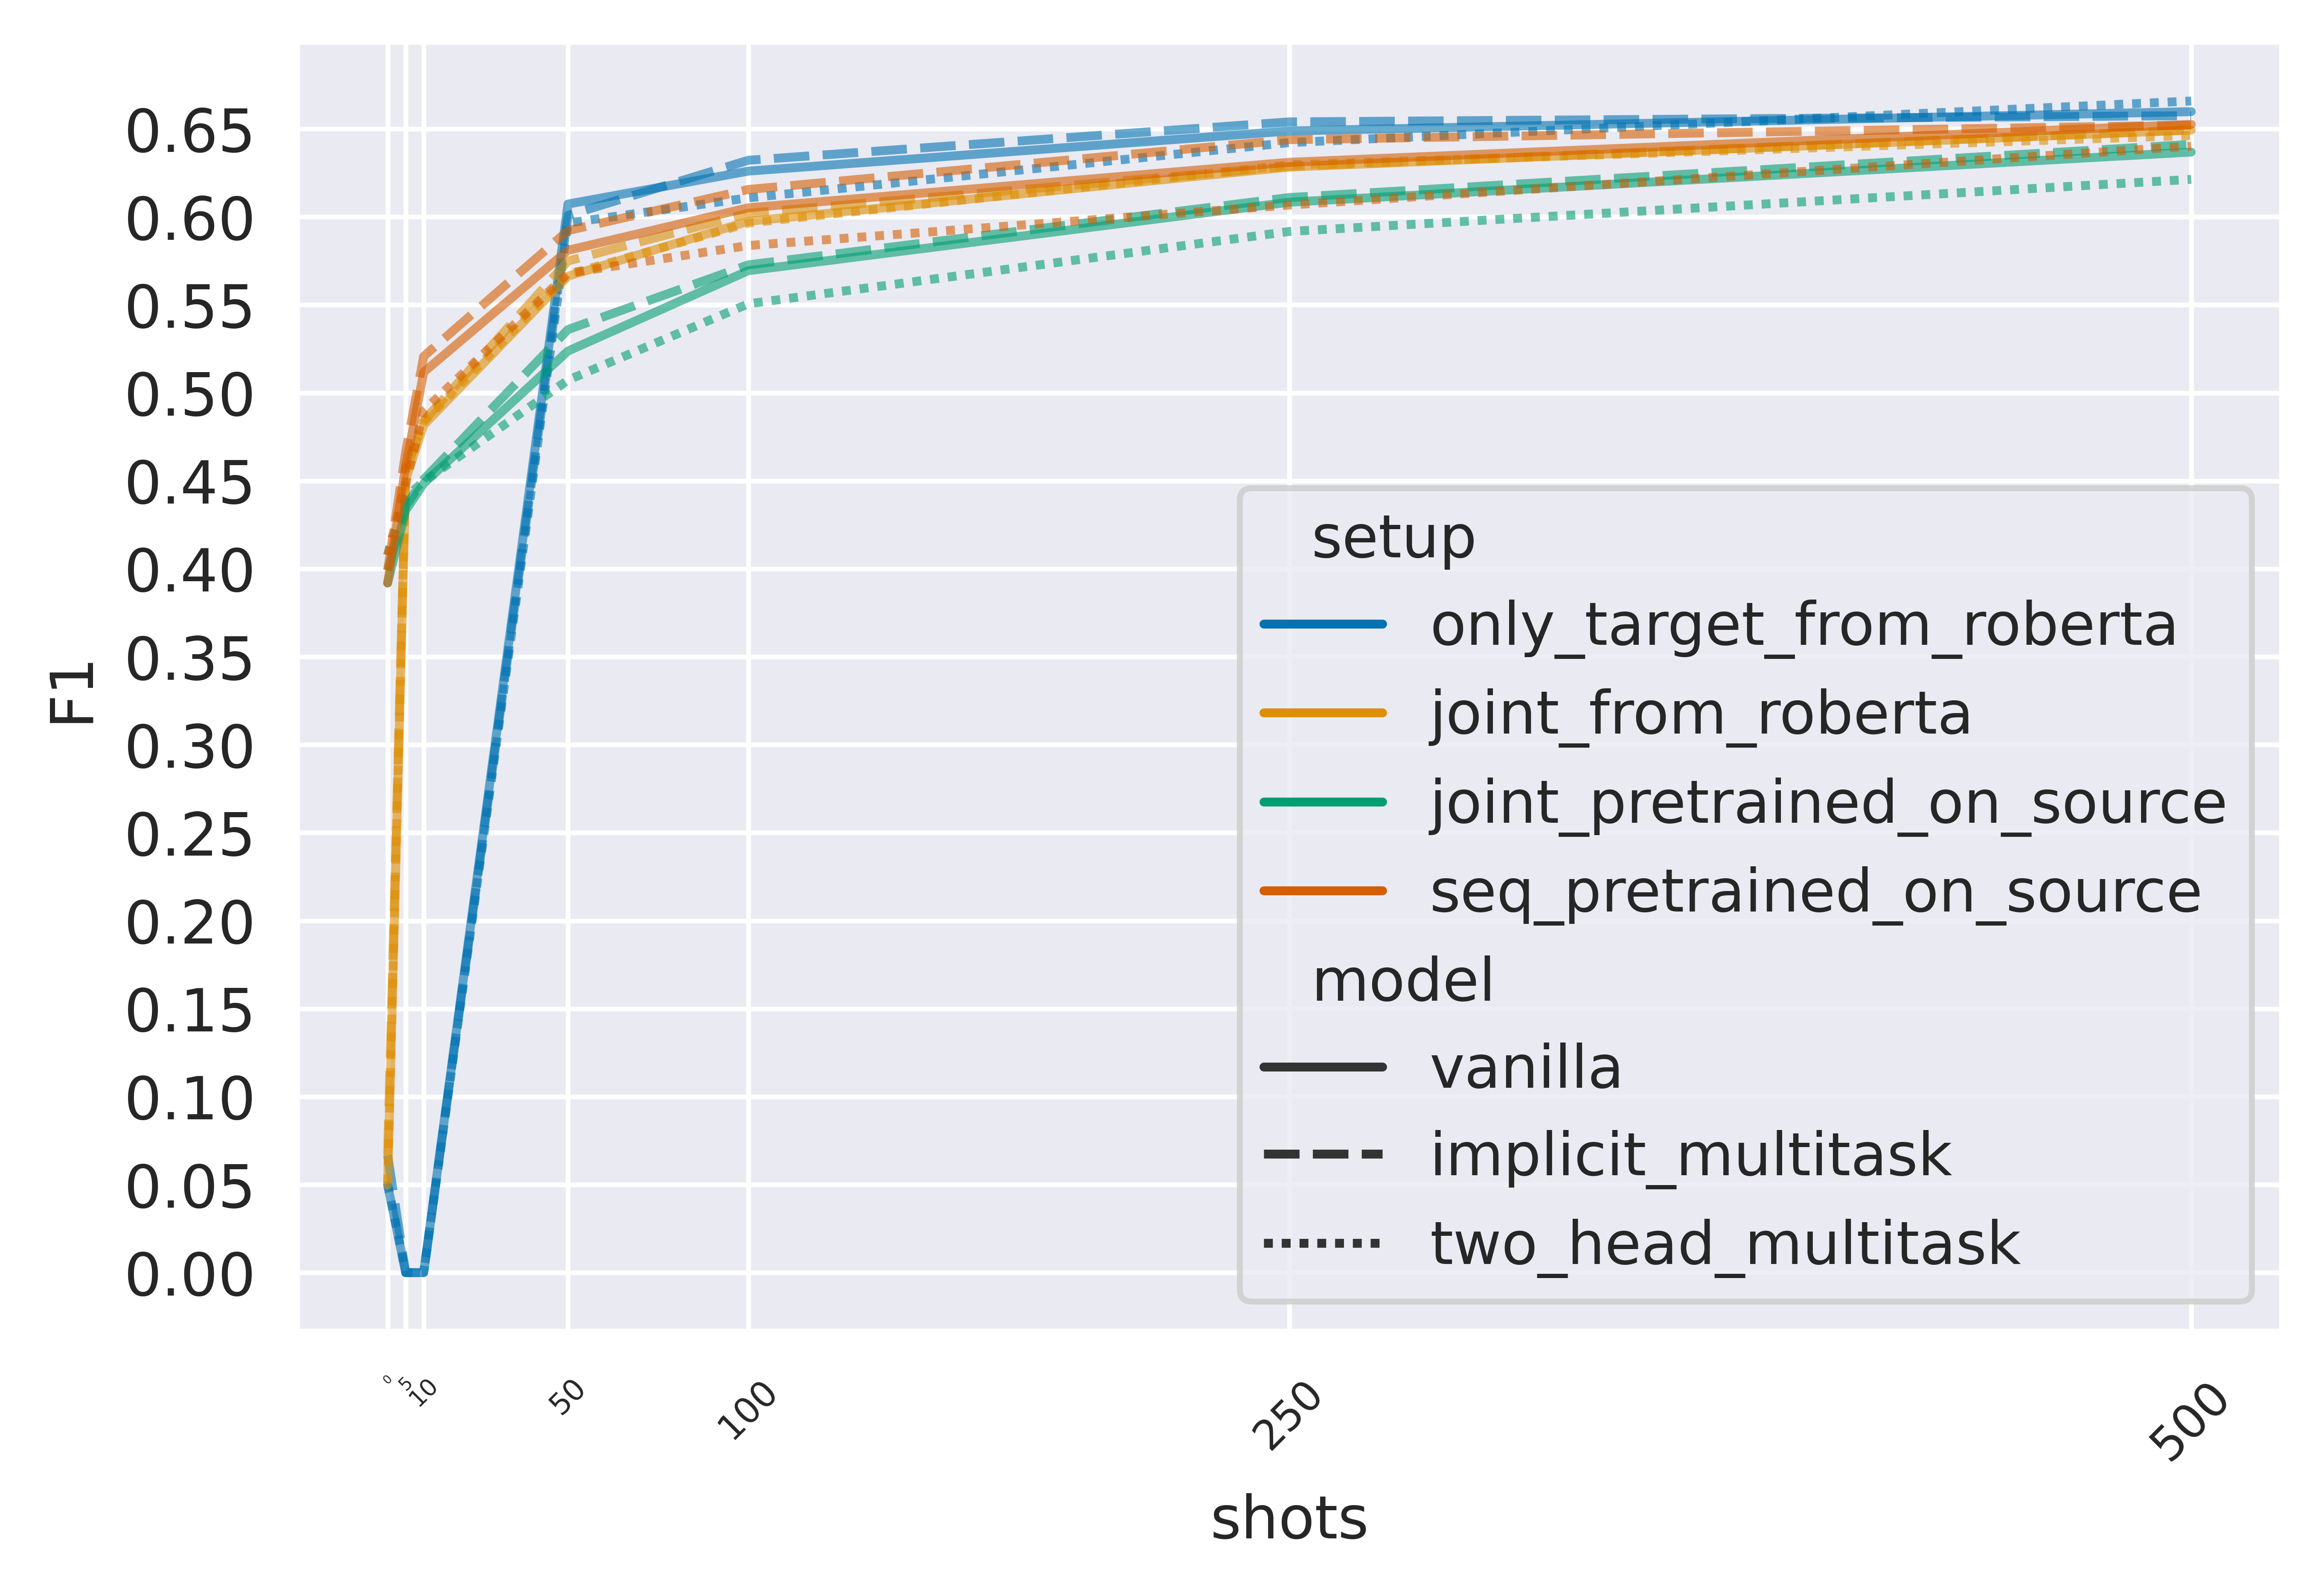

In [21]:
plot_graph(df_f1)

In [8]:
# def extract_source_performance(results, setting):
#     if setting.startswith("zero"):
#         if "test_all_metrics" in results.keys():
#             return round(
#                 results["test_all_metrics"]["identification"]["overall_f1"] * 100, 2
#             )
#         elif "test_all_metrics_trigger" in results.keys():
#             return round(
#                 results["test_all_metrics_trigger"]["identification"]["overall_f1"]
#                 * 100,
#                 2,
#             )
#         else:
#             return round(
#                 results["test_all_metrics (lr_emb=5e-05, hidden_size=10)"][
#                     "identification"
#                 ]["overall_f1"]
#                 * 100,
#                 2,
#             )
#     else:
#         if "test_all_metrics_trigger_averaged" in results.keys():
#             return round(
#                 results["test_all_metrics_trigger_averaged"]["overall_f1_averaged"]
#                 * 100,
#                 2,
#             )
#         elif "test_all_metrics_averaged" in results.keys():
#             return round(
#                 results["test_all_metrics_averaged"]["overall_f1_averaged"] * 100, 2
#             )

In [9]:
# results_seed_42_source = {
#     k: {setting: extract_source_performance(fetch_run_summary(run), k) for setting, run in v.items()}
#     for k, v in results_seed_42.items()
# }